In [ ]:
## Reading Files
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import sklearn
import plotly.express as px
from pandas import Period
from scipy import stats
import re

In [ ]:
%matplotlib inline

## Target Profit Margin Dataset

In [ ]:
tg_pm_df = pd.read_csv('/content/drive/MyDrive/Capstone Data/target_margin.csv',skiprows=2,usecols=[0,1,2,3,4,17,18,19])

In [ ]:
tg_pm_df = tg_pm_df.rename(columns=lambda x:x.strip())

In [ ]:
tg_pm_df = tg_pm_df.melt(id_vars=['Product Class'],value_vars=['Good','Better','Best'],var_name='Category',value_name='Values')

In [ ]:
tg_pm_df[tg_pm_df['Product Class']=='POWACC']

,Product Class,Category,Values
0,POWACC,Good,38%
417,POWACC,Better,36%
834,POWACC,Best,34%


In [ ]:
target_product_ls = list(tg_pm_df['Product Class'].unique())

We do have some information about 21.22 expected profit margin, but might not be helpful since they have 5 categories.

## Profit Margin Exploration

In [ ]:
profit_df = pd.read_csv('/content/drive/MyDrive/Capstone Data/pm_dataset.csv',low_memory=False)

In [ ]:
profit_df['Year-Month'] = profit_df['Year'].astype(str) + '-' + profit_df['Month'].astype(str)
profit_df['Year-Month'] = pd.to_datetime(profit_df['Year-Month'], format='%Y-%m')

In [ ]:
profit_df = profit_df[(~(profit_df['customer_category']=='Average Cost')) & (~(profit_df['customer_category']=='List Price'))]

In [ ]:
profit_df = profit_df[(profit_df['Group']=='Const Supplies CS/SD')|(profit_df['Group']=='Welding Equip WS/SD')]
profit_df = profit_df[profit_df['Own'] == False]

In [ ]:
# profit_df = profit_df[profit_df['Profit_Margin']>-15]

In [ ]:
profit_df[profit_df['Profit_Margin'] == 0]['customer_name'].value_counts()

customer_name
TIC - VENTURE GLOBAL-STRIKEFORCE - CLOSED    606
EMPLOYEE ACCOUNT                             181
INACTIVE KIEWIT POWER CONST. WHS 152         132
WOOD-MIZER LLC WHSE 500                       93
INACTIVE B&W/WHSE 173                         60
                                            ... 
MODERN MAINTENANCE INC.                        1
JOHN R. JURGENSEN CO                           1
BADGER INDUSTRIES                              1
NATIONAL STEEL CITY ERECTING                   1
ME&I CONSTRUCTION SERVICES, INC                1
Name: count, Length: 142, dtype: int64

In [ ]:
final_df = profit_df.groupby(['Year','Month','Group','customer_category','Product_Class','Stock'])['Profit_Margin'].median().reset_index()

In [ ]:
final_df['Date'] = pd.to_datetime(final_df[['Year', 'Month']].assign(day=1))

<Axes: xlabel='Profit_Margin', ylabel='Count'>

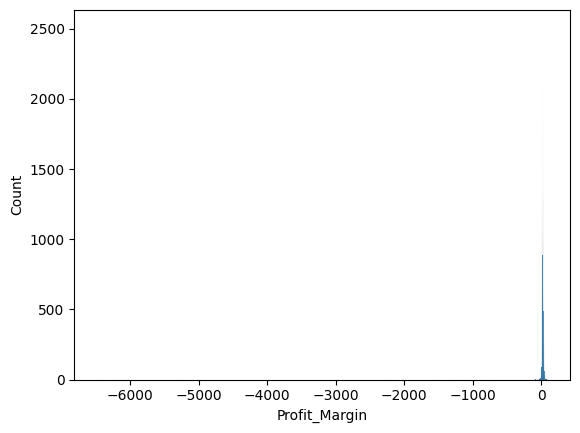

In [ ]:
sns.histplot(final_df['Profit_Margin'])

In [ ]:
product_check = final_df.groupby(['Group','Product_Class']).agg({'Date': 'nunique'}).reset_index()

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

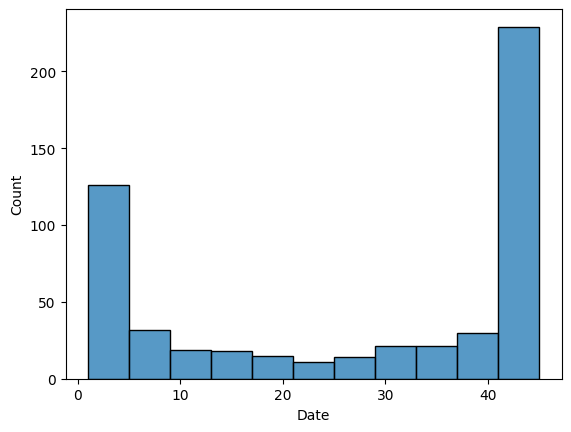

In [ ]:
sns.histplot(product_check['Date'])
sns.histplot

In [ ]:
product_check['Date'].value_counts()

Date
45    168
1      64
44     26
3      23
2      23
43     19
4      16
6      12
40      9
37      8
5       8
42      8
30      8
41      8
39      8
7       8
9       8
36      7
14      7
15      7
12      6
33      6
32      6
19      6
38      5
25      5
24      5
17      4
8       4
27      4
18      4
34      4
35      4
31      4
26      3
29      3
11      3
23      3
21      2
28      2
16      2
10      2
13      2
22      1
20      1
Name: count, dtype: int64

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Capstone Data/final_dataset.csv',index=False)

In [ ]:
final_qt_df = profit_df.groupby(['Quarter','Group','customer_category','Product_Class','Stock'])['Profit_Margin'].median().reset_index()

In [ ]:
final_qt_df.to_csv('/content/drive/MyDrive/Capstone Data/final_quarter_dataset.csv',index=False)

In [ ]:
final_df

,Year,Month,Group,customer_category,Product_Class,Stock,Profit_Margin,Date
0,2020,1,Const Supplies CS/SD,Best,ABRFLW,Y,29.250898,2020-01-01
1,2020,1,Const Supplies CS/SD,Best,ABRMAN,N,43.715031,2020-01-01
2,2020,1,Const Supplies CS/SD,Best,ABRMIS,N,25.501433,2020-01-01
3,2020,1,Const Supplies CS/SD,Best,ABRRFD,N,34.000000,2020-01-01
4,2020,1,Const Supplies CS/SD,Best,BRUBRO,Y,12.946461,2020-01-01
...,...,...,...,...,...,...,...,...
47152,2023,9,Welding Equip WS/SD,Good,WLDDRI,N,34.997854,2023-09-01
47153,2023,9,Welding Equip WS/SD,Good,WLDEMF,N,7.000388,2023-09-01
47154,2023,9,Welding Equip WS/SD,Good,WLDEMF,Y,20.000000,2023-09-01
47155,2023,9,Welding Equip WS/SD,Good,WLDMIS,N,18.000000,2023-09-01


#### Actual - Expected Profit Margin Exploration

Here we generate both mean and median profit margin values.

In [ ]:
final_df_median_pm = final_df.groupby(['Year','Group','Product_Class','customer_category',])['Profit_Margin'].median().reset_index()

In [ ]:
final_df_median_pm.to_csv('/content/drive/MyDrive/Capstone Data/20_23_pm_median_data.csv',index=False)

In [ ]:
final_df_median_pm

,Year,Group,Product_Class,customer_category,Profit_Margin
0,2020,Const Supplies CS/SD,ABRBEL,Better,27.160494
1,2020,Const Supplies CS/SD,ABRBEL,Good,28.070175
2,2020,Const Supplies CS/SD,ABRBEN,Best,31.144928
3,2020,Const Supplies CS/SD,ABRBEN,Better,23.313253
4,2020,Const Supplies CS/SD,ABRBEN,Good,19.461078
...,...,...,...,...,...
4532,2023,Welding Equip WS/SD,WLDWIR,Better,6.000235
4533,2023,Welding Equip WS/SD,WLDWIR,Good,9.734400
4534,2023,Welding Equip WS/SD,Welding Equip WS/SD,Best,25.497303
4535,2023,Welding Equip WS/SD,Welding Equip WS/SD,Better,40.243902


In [ ]:
final_df_mean_pm = final_df.groupby(['Year','Group','Product_Class','customer_category',])['Profit_Margin'].mean().reset_index()

In [ ]:
final_df_mean_pm.to_csv('/content/drive/MyDrive/Capstone Data/20_23_pm_mean_data.csv',index=False)

In [ ]:
final_df_mean_pm

,Year,Group,Product_Class,customer_category,Profit_Margin
0,2020,Const Supplies CS/SD,ABRBEL,Better,27.216164
1,2020,Const Supplies CS/SD,ABRBEL,Good,27.802866
2,2020,Const Supplies CS/SD,ABRBEN,Best,34.326971
3,2020,Const Supplies CS/SD,ABRBEN,Better,24.905499
4,2020,Const Supplies CS/SD,ABRBEN,Good,19.746783
...,...,...,...,...,...
4532,2023,Welding Equip WS/SD,WLDWIR,Better,6.000235
4533,2023,Welding Equip WS/SD,WLDWIR,Good,9.734400
4534,2023,Welding Equip WS/SD,Welding Equip WS/SD,Best,36.888659
4535,2023,Welding Equip WS/SD,Welding Equip WS/SD,Better,34.498130


After consideration, we used median value to validate actual profit margins.

In [ ]:
final_df_20_23_median = final_df_median_pm.merge(tg_pm_df, how='left',left_on=['Product_Class', 'customer_category'],right_on=['Product Class', 'Category'],indicator=True)

In [ ]:
final_df_20_23_median

,Year,Group,Product_Class,customer_category,Profit_Margin,Product Class,Category,Values,_merge
0,2020,Const Supplies CS/SD,ABRBEL,Better,27.160494,ABRBEL,Better,36%,both
1,2020,Const Supplies CS/SD,ABRBEL,Good,28.070175,ABRBEL,Good,38%,both
2,2020,Const Supplies CS/SD,ABRBEN,Best,31.144928,ABRBEN,Best,34%,both
3,2020,Const Supplies CS/SD,ABRBEN,Better,23.313253,ABRBEN,Better,36%,both
4,2020,Const Supplies CS/SD,ABRBEN,Good,19.461078,ABRBEN,Good,38%,both
...,...,...,...,...,...,...,...,...,...
4532,2023,Welding Equip WS/SD,WLDWIR,Better,6.000235,WLDWIR,Better,15%,both
4533,2023,Welding Equip WS/SD,WLDWIR,Good,9.734400,WLDWIR,Good,20%,both
4534,2023,Welding Equip WS/SD,Welding Equip WS/SD,Best,25.497303,NaN,NaN,NaN,left_only
4535,2023,Welding Equip WS/SD,Welding Equip WS/SD,Better,40.243902,NaN,NaN,NaN,left_only


In [ ]:
final_df_20_23_median['_merge'].value_counts()

_merge
both          4294
left_only      243
right_only       0
Name: count, dtype: int64

In [ ]:
final_df_20_23_median = final_df_20_23_median.rename(columns={'Values':'Target Margin'})

#### Median figure generation

In [ ]:
excluded_items = final_df_20_23_median[final_df_20_23_median['_merge']=='left_only']

In [ ]:
final_df_20_23_median = final_df_20_23_median[final_df_20_23_median['_merge'] == 'both']

In [ ]:
final_df_20_23_median = final_df_20_23_median[(final_df_20_23_median['Group'] == 'Const Supplies CS/SD')|(final_df_20_23_median['Group'] == 'Welding Equip WS/SD')]

In [ ]:
final_df_20_23_median

,Year,Group,Product_Class,customer_category,Profit_Margin,Product Class,Category,Target Margin,_merge
0,2020,Const Supplies CS/SD,ABRBEL,Better,27.160494,ABRBEL,Better,36%,both
1,2020,Const Supplies CS/SD,ABRBEL,Good,28.070175,ABRBEL,Good,38%,both
2,2020,Const Supplies CS/SD,ABRBEN,Best,31.144928,ABRBEN,Best,34%,both
3,2020,Const Supplies CS/SD,ABRBEN,Better,23.313253,ABRBEN,Better,36%,both
4,2020,Const Supplies CS/SD,ABRBEN,Good,19.461078,ABRBEN,Good,38%,both
...,...,...,...,...,...,...,...,...,...
4529,2023,Welding Equip WS/SD,WLDPAR,Better,36.364645,WLDPAR,Better,36%,both
4530,2023,Welding Equip WS/SD,WLDSPG,Good,9.999804,WLDSPG,Good,20%,both
4531,2023,Welding Equip WS/SD,WLDWIR,Best,9.500042,WLDWIR,Best,10%,both
4532,2023,Welding Equip WS/SD,WLDWIR,Better,6.000235,WLDWIR,Better,15%,both


In [ ]:
final_df_20_23_median = final_df_20_23_median.sort_values(['Group','customer_category'])

In [ ]:
final_df_20_23_median.drop(columns='_merge',inplace=True)

In [ ]:
final_df_20_23_median['Target Margin'] = final_df_20_23_median['Target Margin'].str.replace('%', '').astype(float)

In [ ]:
final_df_20_23_median['Margin Difference(%)'] = final_df_20_23_median['Profit_Margin'] - final_df_20_23_median['Target Margin']

In [ ]:
final_df_20_23_median.to_csv("/content/drive/MyDrive/Capstone Data/20_23_pm_diff.csv")

In [ ]:
final_df_20_23_median['Year'].value_counts()

Year
2022    1147
2021    1054
2020    1051
2023    1042
Name: count, dtype: int64

In [ ]:
final_df_20_23_median

,Year,Group,Product_Class,customer_category,Profit_Margin,Product Class,Category,Target Margin,Margin Difference(%)
2,2020,Const Supplies CS/SD,ABRBEN,Best,31.144928,ABRBEN,Best,34.0,-2.855072
5,2020,Const Supplies CS/SD,ABRCAR,Best,12.187484,ABRCAR,Best,34.0,-21.812516
7,2020,Const Supplies CS/SD,ABRCON,Best,21.507175,ABRCON,Best,34.0,-12.492825
11,2020,Const Supplies CS/SD,ABRCUT,Best,16.883117,ABRCUT,Best,34.0,-17.116883
12,2020,Const Supplies CS/SD,ABRFLD,Best,23.860540,ABRFLD,Best,34.0,-10.139460
...,...,...,...,...,...,...,...,...,...
4521,2023,Welding Equip WS/SD,WLDGAS,Good,3.301793,WLDGAS,Good,20.0,-16.698207
4524,2023,Welding Equip WS/SD,WLDMIS,Good,18.000000,WLDMIS,Good,20.0,-2.000000
4527,2023,Welding Equip WS/SD,WLDOPT,Good,24.366529,WLDOPT,Good,20.0,4.366529
4530,2023,Welding Equip WS/SD,WLDSPG,Good,9.999804,WLDSPG,Good,20.0,-10.000196


### Visualizations for Profit Margin Diff

In [ ]:
def plot_margin(df, year, customer_category):
    df = df[(df['Customer Category'] == customer_category) & (df['Year'] == year)]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=df["Product Class"], y=df['Difference'], hue="Item Group")
    # Remove tick labels for x-axis
    plt.xticks([])
    plt.ylabel('Difference between Actual and Expected Profit Margin (in %)')
    plt.title(f'The Difference between Actual Profit Margin and Expected Profit Margin in {year} by Product Class and {customer_category} Customer.')
    plt.axhline(y=0, color="black", linestyle="--")
    # for index, row in df.iterrows():
    #     difference = row['Actual Margin'] - row['Target Margin']
    #     if difference < -10:  # Define your threshold for large values
    #         plt.text(row["Product Class"], difference, f"{row['Product Class']}: {difference:.2f}", ha='center', va='bottom', fontsize=8, color='blue')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

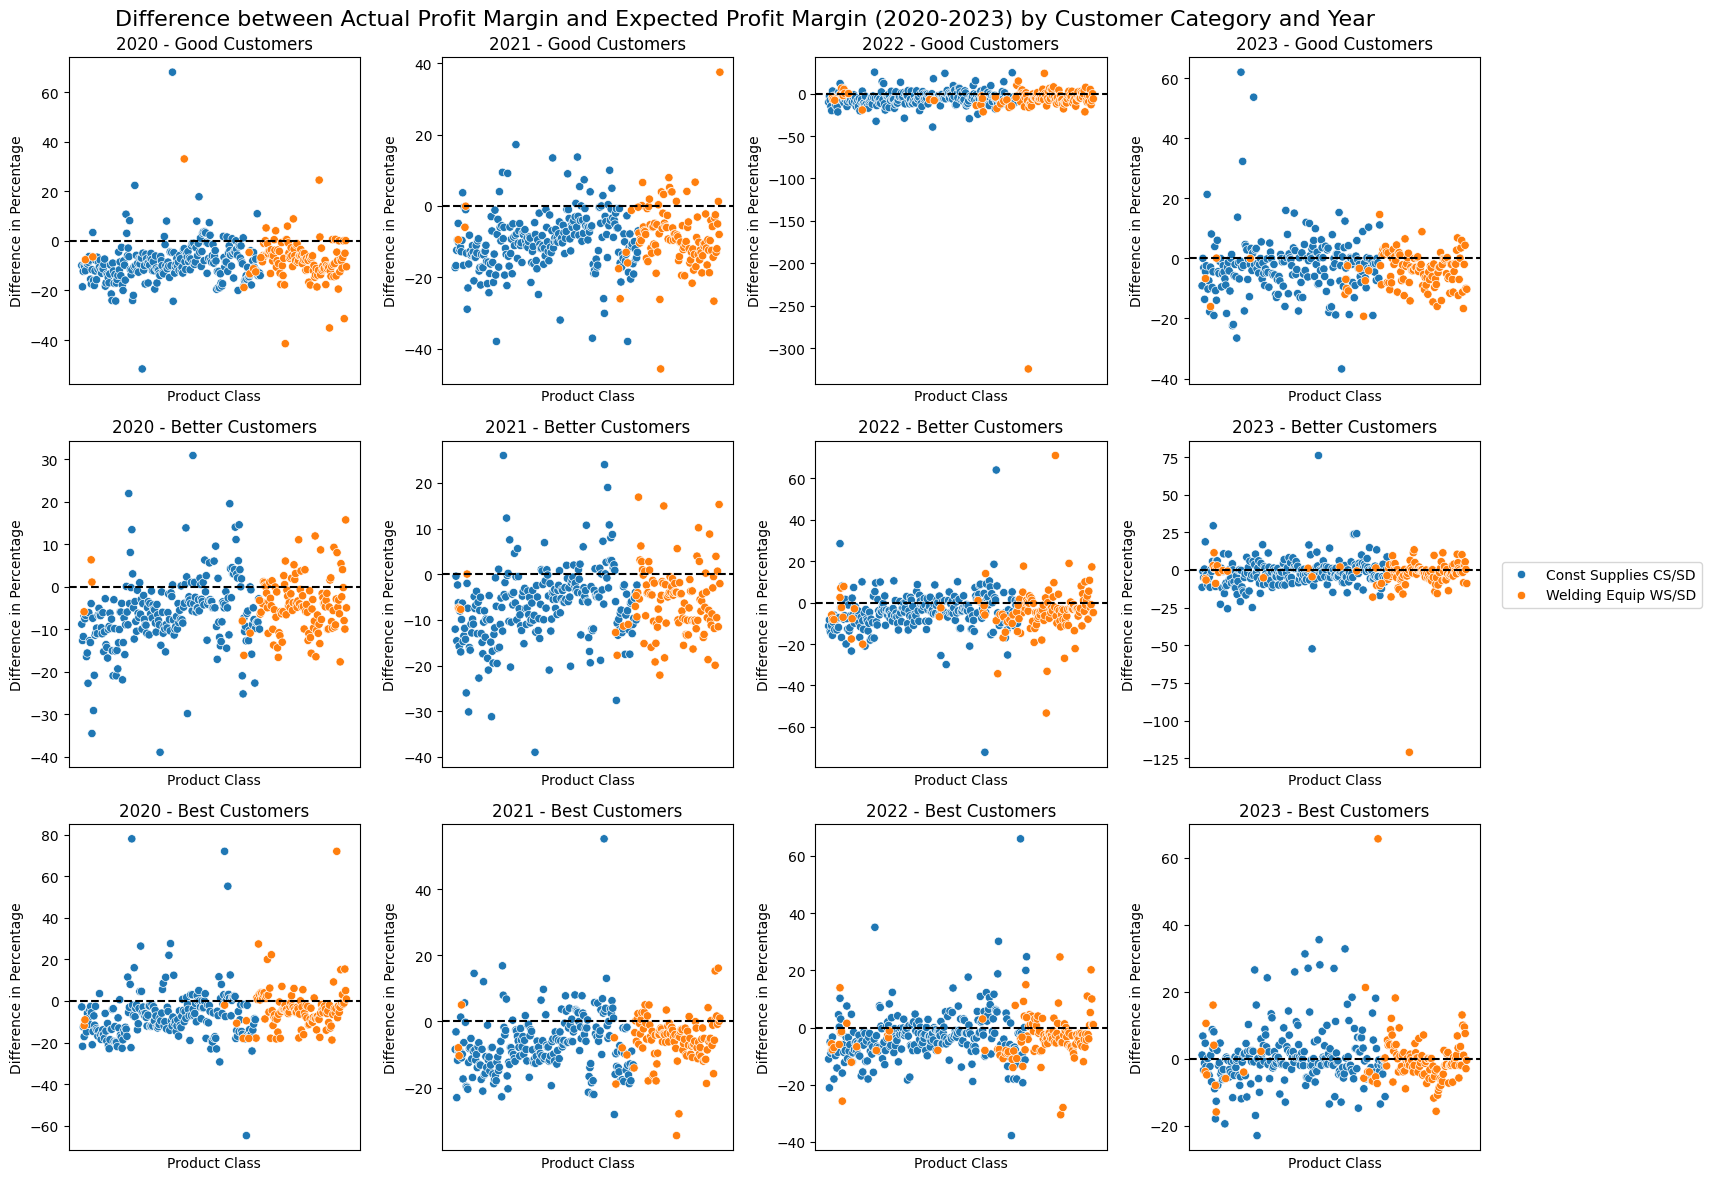

In [ ]:
def plot_margin(ax, df, year, customer_category):
    df = df[(df['customer_category'] == customer_category) & (df['Year'] == year)]
    sns.scatterplot(data=df, x=df["Product Class"], y=df['Margin Difference(%)'], hue="Group", ax=ax)
    # Remove tick labels for x-axis
    ax.set_xticks([])
    ax.axhline(y=0, color="black", linestyle="--")
    ax.legend_.remove()
    ax.set_ylabel('Difference in Percentage')
    ax.set_title(f'{year} - {customer_category.capitalize()} Customers')


years = [2020,2021,2022, 2023]
customer_categories = ['Good', 'Better','Best']

fig, axes = plt.subplots(nrows=len(customer_categories), ncols=len(years), figsize=(15, 12))

for i, customer_category in enumerate(customer_categories):
    for j, year in enumerate(years):
        ax = axes[i][j]
        plot_margin(ax, final_df_20_23_median, year, customer_category)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Difference between Actual Profit Margin and Expected Profit Margin (2020-2023) by Customer Category and Year', fontsize=16)

plt.tight_layout()
plt.show()

### [-25, 25] Difference range trend

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Data/20_23_pm_median_data.csv')

In [ ]:
df.columns

Index(['Year', 'Group', 'Product_Class', 'customer_category', 'Profit_Margin'], dtype='object')

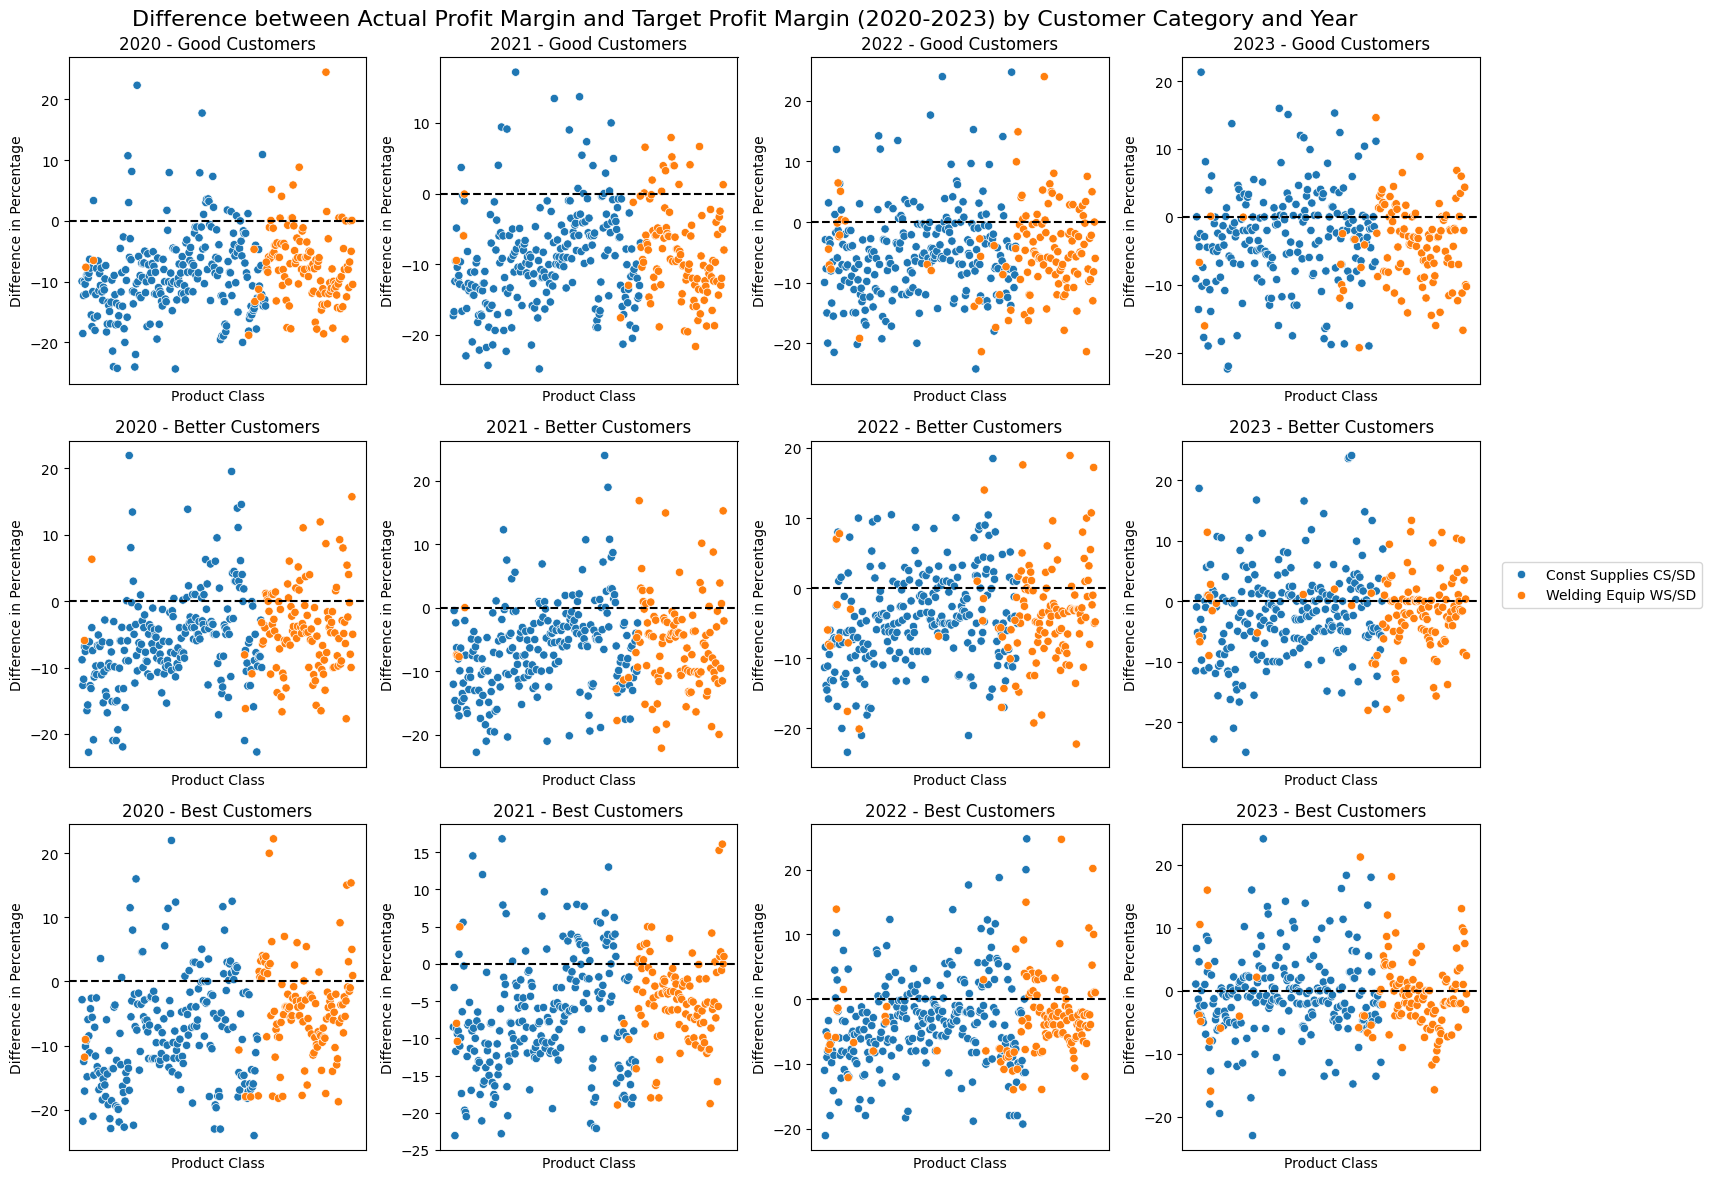

In [ ]:
def plot_margin(ax, df, year, customer_category):
    df = df[(df['customer_category'] == customer_category) & (df['Year'] == year)]
    df = df[(df['Margin Difference(%)'] >= -25) & (df['Margin Difference(%)'] <= 25)]
    sns.scatterplot(data=df, x=df["Product Class"], y=df['Margin Difference(%)'], hue="Group", ax=ax)
    # Remove tick labels for x-axis
    ax.set_xticks([])
    ax.axhline(y=0, color="black", linestyle="--")
    ax.legend_.remove()
    ax.set_ylabel('Difference in Percentage')
    ax.set_title(f'{year} - {customer_category.capitalize()} Customers')


years = [2020,2021,2022, 2023]
customer_categories = ['Good', 'Better', 'Best']

fig, axes = plt.subplots(nrows=len(customer_categories), ncols=len(years), figsize=(15, 12))

for i, customer_category in enumerate(customer_categories):
    for j, year in enumerate(years):
        ax = axes[i][j]
        plot_margin(ax, final_df_20_23_median, year, customer_category)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Difference between Actual Profit Margin and Target Profit Margin (2020-2023) by Customer Category and Year', fontsize=16)

plt.tight_layout()
plt.show()

### Statistical Significance

In [174]:
final_df_23_median = final_df_20_23_median[final_df_20_23_median['Year'] == 2023]

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


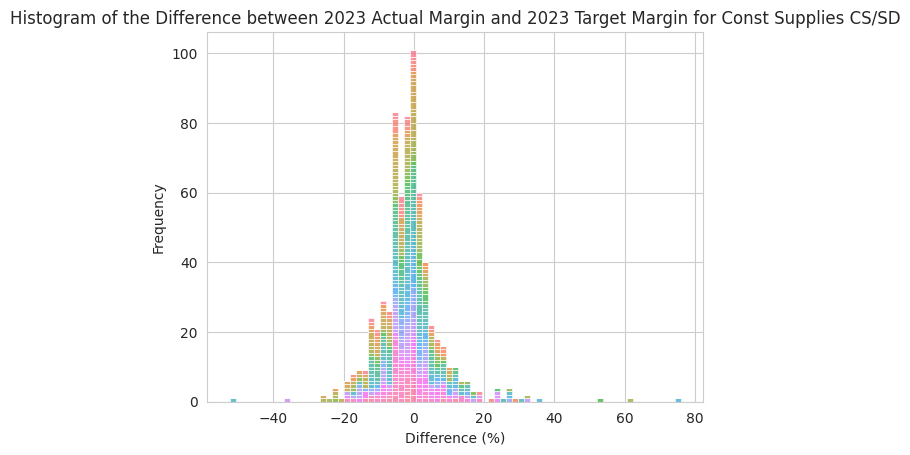

In [175]:
sns.histplot(data=final_df_23_median[final_df_23_median['Group'] == 'Const Supplies CS/SD'], x=final_df_23_median['Profit_Margin'] - final_df_23_median['Target Margin'], hue="Product Class", multiple="stack", legend=False)
plt.xlabel('Difference (%)')
plt.ylabel('Frequency')
plt.title('Histogram of the Difference between 2023 Actual Margin and 2023 Target Margin for Const Supplies CS/SD')
plt.show()

The normality assumption of the difference in paired sample t-test is satisfied.

In [ ]:
def item_test(df, group, customer_category, year):
  # Filter the DataFrame
  filtered_df = df.loc[(df['Group'] == group) & (df['Category'] == customer_category) & (df['Year'] == year)]

  # Now perform the t-test with the cleaned DataFrame
  t_statistic, p_value = stats.ttest_rel(filtered_df['Profit_Margin'], filtered_df['Target Margin'])
  return p_value


In [ ]:
welding_p_value = {2020:[],2021:[],2022:[],2023:[]}
for i in final_df_20_23_median['Group'].unique():
  for j in ['Good','Better','Best']:
    print(j)
    for k in final_df_20_23_median['Year'].unique():
      res = item_test(final_df_20_23_median, i, j,k)
      print(f'The p-value for {j} customer in {i} in {k} is {res}')
      if i == 'Const Supplies CS/SD':
        welding_p_value[k].append(res)

Good
The p-value for Good customer in Const Supplies CS/SD in 2021 is 6.7580459038883525e-09
The p-value for Good customer in Const Supplies CS/SD in 2023 is 0.015754573433750196
The p-value for Good customer in Const Supplies CS/SD in 2020 is 5.557151909586692e-31
The p-value for Good customer in Const Supplies CS/SD in 2022 is 2.6458906934328747e-13
Better
The p-value for Better customer in Const Supplies CS/SD in 2021 is 9.954217581867396e-11
The p-value for Better customer in Const Supplies CS/SD in 2023 is 0.05354737982672406
The p-value for Better customer in Const Supplies CS/SD in 2020 is 6.445903532252329e-15
The p-value for Better customer in Const Supplies CS/SD in 2022 is 8.691683861950757e-12
Best
The p-value for Best customer in Const Supplies CS/SD in 2021 is 2.7505561457973635e-07
The p-value for Best customer in Const Supplies CS/SD in 2023 is 0.6489081968847554
The p-value for Best customer in Const Supplies CS/SD in 2020 is 7.684350646710805e-11
The p-value for Best 

In [ ]:
result = pd.DataFrame(welding_p_value)
result.index = ['Good','Better','Best']
result

,2020,2021,2022,2023
Good,5.557152e-31,6.758046e-09,2.645891e-13,0.015755
Better,6.445904e-15,9.954218e-11,8.691684e-12,0.053547
Best,7.684351e-11,2.750556e-07,9.859533e-07,0.648908


We can tell the target margins are probably achieved in best customer category, but not achieved in the other category.  

If we only care if the actual margin exceeds the target margin, we can perform one sided t-test.

In [ ]:
def one_sided_ttest(df, group, customer_category):
  # Filter the DataFrame
  filtered_df = df.loc[(df['Item Group'] == group) & (df['Category'] == customer_category)]

  # Perform the one-sided t-test
  t_statistic, p_value = stats.ttest_rel(filtered_df['Actual Margin'], filtered_df['Target Margin'], alternative='greater')

  return p_value



In [ ]:
for i in final_df_23_median['Item Group'].unique():
  for j in final_df_23_median['Customer Category'].unique():
    print(f'The p-value for {j} customer in {i} in 2023 is {one_sided_ttest(final_df_23_median, i, j)}')

The p-value for Good customer in Const Supplies CS/SD in 2023 is 0.9999678976288637
The p-value for Best customer in Const Supplies CS/SD in 2023 is 0.3774477537895906
The p-value for Better customer in Const Supplies CS/SD in 2023 is 0.9958552236394931
The p-value for Good customer in Welding Equip WS/SD in 2023 is 0.9999999999997431
The p-value for Best customer in Welding Equip WS/SD in 2023 is 0.7650871997591686
The p-value for Better customer in Welding Equip WS/SD in 2023 is 0.9970787314506093


In [ ]:
one_sided_ttest(final_df_23_median, 'Const Supplies CS/SD', 'Good')

0.9999678976288637

## Outliers

In [ ]:
outlier_df = pd.read_csv("/content/drive/MyDrive/Capstone Data/20_23_pm_outlier.csv")

In [ ]:
outlier_df = outlier_df.drop(columns=['Unnamed: 0'])

In [ ]:
outlier_df_good = outlier_df[outlier_df['Margin Difference(%)'] > 0]
outlier_df_bad = outlier_df[outlier_df['Margin Difference(%)'] < 0]

In [ ]:
good_product_set = set(outlier_df_good['Product Class'].unique())
bad_product_set = set(outlier_df_bad['Product Class'].unique())

overlap_values = good_product_set.intersection(bad_product_set)
overlap_values

{'ELEMIS', 'EQULIG', 'HANCEM', 'HWCMIS', 'HWCPOW', 'SAFACC'}

In [ ]:
def produce_product_list(df):
  instance_counts = df.groupby(['Item Group', 'Product Class']).size().reset_index()
  instance_counts.rename(columns={0: 'Counts'}, inplace=True)
  product_list = instance_counts[instance_counts['Counts'] > 1]['Product Class'].tolist()
  temp_df = df[df['Product Class'].isin(product_list)]
  temp_df_sorted = temp_df.sort_values(by=['Item Group', 'Product Class','Year'])
  final_df = temp_df_sorted.drop(columns=['Category'])
  return final_df

In [ ]:
bad_product = produce_product_list(outlier_df_bad)

In [ ]:
bad_product

,Year,Item Group,Product Class,Customer Category,Actual Margin,Target Margin,Margin Difference(%)
2,2020,Const Supplies CS/SD,BRUHAN,Good,9.624413,38.0,-28.375587
65,2020,Const Supplies CS/SD,BRUHAN,Better,5.839416,36.0,-30.160584
11,2021,Const Supplies CS/SD,BRUHAN,Good,5.839416,38.0,-32.160584
74,2021,Const Supplies CS/SD,BRUHAN,Better,5.839416,36.0,-30.160584
64,2020,Const Supplies CS/SD,CUTMIS,Better,8.000000,40.0,-32.000000
78,2021,Const Supplies CS/SD,CUTMIS,Better,1.500000,40.0,-38.500000
16,2021,Const Supplies CS/SD,ELEMIS,Good,0.000000,38.0,-38.000000
28,2022,Const Supplies CS/SD,ELEMIS,Good,0.343113,38.0,-37.656887
96,2023,Const Supplies CS/SD,ELEMIS,Better,9.883135,36.0,-26.116865
68,2020,Const Supplies CS/SD,HANPLU,Better,-11.250000,29.0,-40.250000


In [ ]:
good_product = produce_product_list(outlier_df_good)

In [ ]:
good_product

,Year,Item Group,Product Class,Customer Category,Actual Margin,Target Margin,Margin Difference(%)
85,2022,Const Supplies CS/SD,APPFIT,Better,54.347826,24.0,30.347826
94,2023,Const Supplies CS/SD,APPFIT,Better,53.333333,24.0,29.333333
27,2022,Const Supplies CS/SD,ELEGFI,Good,75.557565,38.0,37.557565
49,2022,Const Supplies CS/SD,ELEGFI,Best,71.927355,34.0,37.927355
41,2020,Const Supplies CS/SD,POWEXP,Best,67.205556,12.0,55.205556
45,2021,Const Supplies CS/SD,POWEXP,Best,67.205556,12.0,55.205556
54,2022,Welding Equip WS/SD,SAFNOI,Best,99.595960,34.0,65.595960
63,2023,Welding Equip WS/SD,SAFNOI,Best,99.636672,34.0,65.636672


In [ ]:
unique_pairs_list = list(good_product[['Item Group', 'Product Class']].drop_duplicates().itertuples(index=False, name=None))
unique_pairs_list

[('Const Supplies CS/SD', 'APPFIT'),
 ('Const Supplies CS/SD', 'ELEGFI'),
 ('Const Supplies CS/SD', 'POWEXP'),
 ('Welding Equip WS/SD', 'SAFNOI')]

In [ ]:
outlier_df[outlier_df['Product Class']=='BRUHAN']

,Year,Item Group,Product Class,Customer Category,Actual Margin,Category,Target Margin,Margin Difference(%)
2,2020,Const Supplies CS/SD,BRUHAN,Good,9.624413,Good,38.0,-28.375587
11,2021,Const Supplies CS/SD,BRUHAN,Good,5.839416,Good,38.0,-32.160584
65,2020,Const Supplies CS/SD,BRUHAN,Better,5.839416,Better,36.0,-30.160584
74,2021,Const Supplies CS/SD,BRUHAN,Better,5.839416,Better,36.0,-30.160584


#### Outlier Analysis

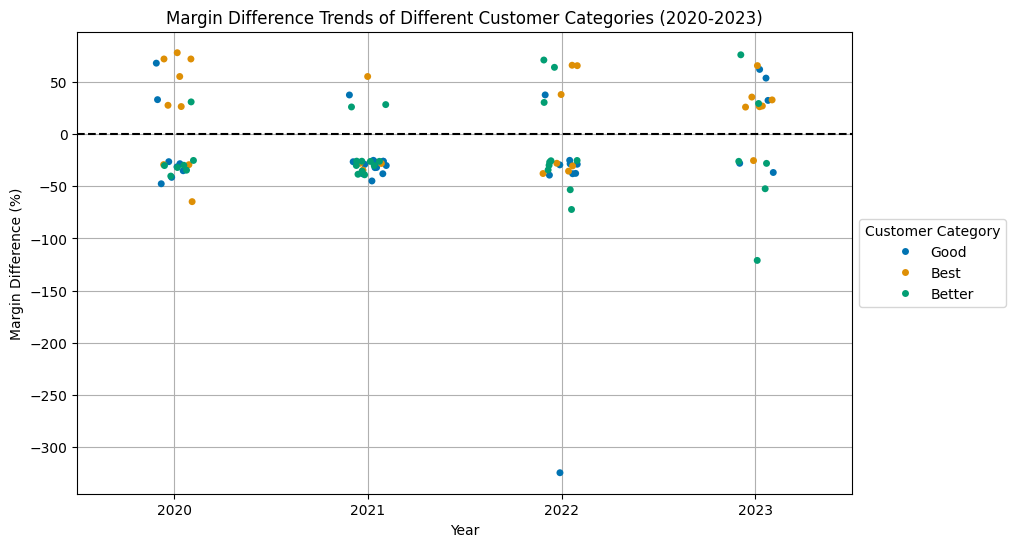

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=outlier_df, x='Year', y='Margin Difference(%)', hue='Customer Category', palette='colorblind')
plt.title('Margin Difference Trends of Different Customer Categories (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Margin Difference (%)')
plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0

# Add legend with title
plt.legend(title='Customer Category', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

<ipython-input-166-768952f86c84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=outlier_record[outlier_record['Year'] == year], x='Customer Category', y='Margin Difference(%)', palette='colorblind')
<ipython-input-166-768952f86c84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=outlier_record[outlier_record['Year'] == year], x='Customer Category', y='Margin Difference(%)', palette='colorblind')
<ipython-input-166-768952f86c84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=outlier_record[outlier_record['Year'] == y

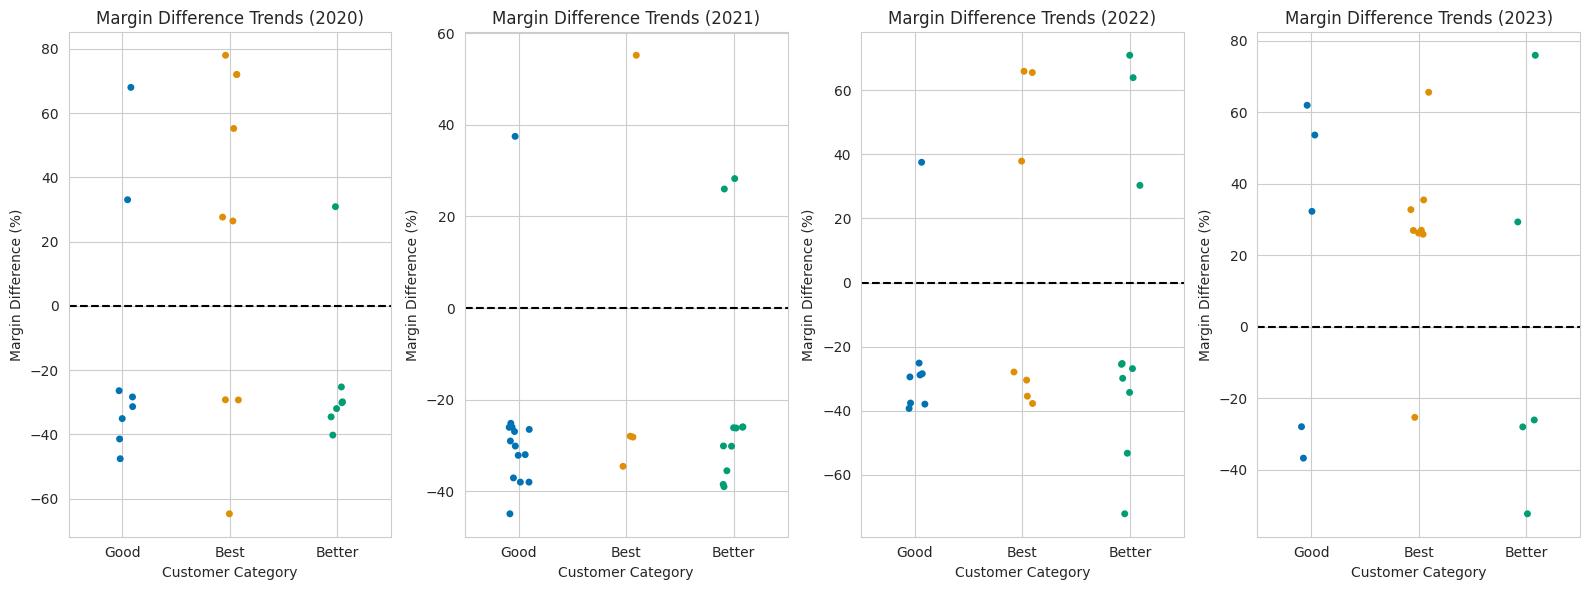

In [ ]:
outlier_record = outlier_df [(~(outlier_df['Product Class'] == 'BRUMIS'))&(~(outlier_df ['Product Class'] == 'FILELC'))]
years = outlier_record['Year'].unique()

plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

for i, year in enumerate(years, 1):
    plt.subplot(1, len(years), i)
    sns.stripplot(data=outlier_record[outlier_record['Year'] == year], x='Customer Category', y='Margin Difference(%)', palette='colorblind')
    plt.title(f'Margin Difference Trends ({year})')
    plt.xlabel('Customer Category')
    plt.ylabel('Margin Difference (%)')
    plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
product_class_counts = outlier_record.groupby('Product Class')['Customer Category'].nunique().reset_index()

In [ ]:
changed_product = product_class_counts[product_class_counts['Customer Category'] != 1]['Product Class'].tolist()

In [ ]:
changed_product_df = outlier_record[outlier_record['Product Class'].isin(changed_product)].sort_values(['Item Group','Product Class'])

In [ ]:
changed_product_df

,Year,Item Group,Product Class,Customer Category,Actual Margin,Category,Target Margin,Margin Difference(%)
2,2020,Const Supplies CS/SD,BRUHAN,Good,9.624413,Good,38.0,-28.375587
11,2021,Const Supplies CS/SD,BRUHAN,Good,5.839416,Good,38.0,-32.160584
65,2020,Const Supplies CS/SD,BRUHAN,Better,5.839416,Better,36.0,-30.160584
74,2021,Const Supplies CS/SD,BRUHAN,Better,5.839416,Better,36.0,-30.160584
27,2022,Const Supplies CS/SD,ELEGFI,Good,75.557565,Good,38.0,37.557565
49,2022,Const Supplies CS/SD,ELEGFI,Best,71.927355,Best,34.0,37.927355
16,2021,Const Supplies CS/SD,ELEMIS,Good,0.000000,Good,38.0,-38.000000
28,2022,Const Supplies CS/SD,ELEMIS,Good,0.343113,Good,38.0,-37.656887
33,2023,Const Supplies CS/SD,ELEMIS,Good,100.000000,Good,38.0,62.000000
96,2023,Const Supplies CS/SD,ELEMIS,Better,9.883135,Better,36.0,-26.116865


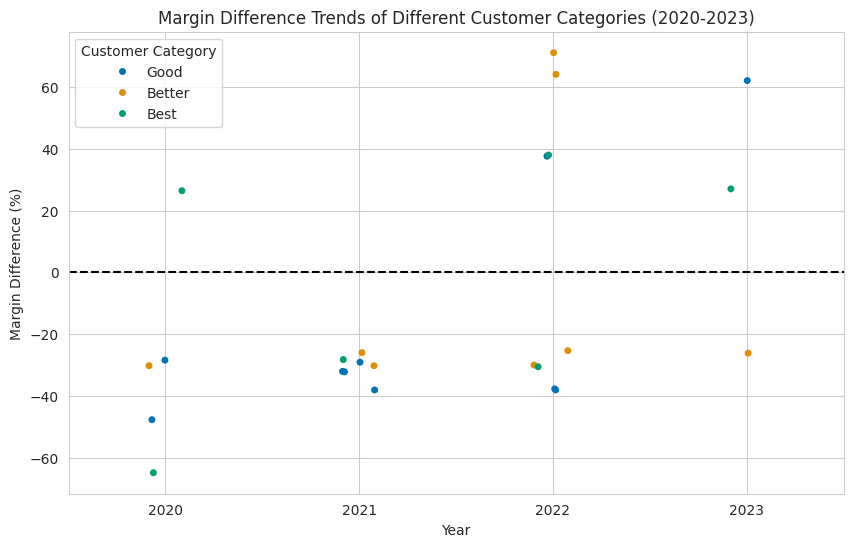

In [ ]:
sns.set_style("whitegrid")

# Create categorical scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=changed_product_df, x='Year', y=changed_product_df['Margin Difference(%)'], hue='Customer Category', palette='colorblind')
plt.title('Margin Difference Trends of Different Customer Categories (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Margin Difference (%)')
plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0
plt.legend(title='Customer Category')
plt.grid(True)
plt.show()

In [ ]:
outlier_record['Product Class'].value_counts()

Product Class
BRUHAN    4
ELEMIS    4
FILCLA    3
SAFNOI    2
CUTMIS    2
         ..
MATCAN    1
MIGMIS    1
WEMMIS    1
HWCCAB    1
CHECOO    1
Name: count, Length: 70, dtype: int64

In [ ]:
outlier_record['Year'].value_counts()

Year
2021    29
2022    25
2020    24
2023    18
Name: count, dtype: int64